In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
from gensim.models import KeyedVectors
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from imblearn.under_sampling import RandomUnderSampler
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 


In [3]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review

# #function to remove  stopwords
# StopWords_path = 'http://www.site.uottawa.ca/~diana/csi5180/StopWords'
# StopWords = pd.read_csv(StopWords_path, header=None)
# english_stop_words = StopWords[0].values.tolist()
# # english_stop_words = stopwords.words('english')
# def remove_stop_words(corpus):
#     removed_stop_words = []
#     for review in corpus:
#         removed_stop_words.append(
#             ''.join([word for word in review.split() 
#                       if word not in english_stop_words])
#         )
#     removed_stop_words = list(filter(lambda x: x != '', removed_stop_words))
#     return removed_stop_words



In [4]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [5]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [6]:
Data_path = 'questions.csv'
Data = pd.read_csv(Data_path)

In [7]:
embedding_dim = 300
max_features = 5000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

In [8]:
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['question1'] = Data['question1'].astype('str')
Data['question2'] = Data['question2'].astype('str')
train, test = train_test_split(Data, test_size=0.1)
train, validation = train_test_split(train, test_size=0.1)

In [9]:
train['question1'] = train.question1.apply(clean_data)
train['question2'] = train.question2.apply(clean_data)
test['question1'] = test.question1.apply(clean_data)
test['question2'] = test.question2.apply(clean_data)

In [10]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
word2vec.init_sims(replace=True)

In [11]:
print("Train Data Shape:",train.shape)
print("Validation Data Shape:",validation.shape)
print("Test Data Shape :",test.shape)

print("Train Data : \n",train["is_duplicate"].value_counts())
print("\nValidation Data : \n",validation["is_duplicate"].value_counts())
print("\nTest Data :\n",test["is_duplicate"].value_counts())

Train Data Shape: (327521, 6)
Validation Data Shape: (36392, 6)
Test Data Shape : (40435, 6)
Train Data : 
 0    206531
1    120990
Name: is_duplicate, dtype: int64

Validation Data : 
 0    22936
1    13456
Name: is_duplicate, dtype: int64

Test Data :
 0    25575
1    14860
Name: is_duplicate, dtype: int64


In [12]:
train_sentence1 = train['question1'].values
train_sentence2 = train['question2'].values

validation_sentence1 = validation['question1'].values
validation_sentence2 = validation['question2'].values

test_sentence1 = test['question1'].values
test_sentence2 = test['question2'].values

In [13]:
NUM_WORDS = len(word2vec.vocab)

print('Found %s samples.' % len(train_sentence1))

train_sentences = train_sentence1 + train_sentence2


tokenizer = Tokenizer(num_words = NUM_WORDS)
tokenizer.fit_on_texts(train_sentences)

sentence1_word_sequences = tokenizer.texts_to_sequences(train_sentence1)
sentence2_word_sequences = tokenizer.texts_to_sequences(train_sentence2)

validation_sentence1_word_sequences = tokenizer.texts_to_sequences(validation_sentence1)
validation_sentence2_word_sequences = tokenizer.texts_to_sequences(validation_sentence2)

test_sentence1_word_sequences = tokenizer.texts_to_sequences(test_sentence1)
test_sentence2_word_sequences = tokenizer.texts_to_sequences(test_sentence2)



word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 327521 samples.
Found 73147 unique tokens.


In [14]:
nb_words = min(NUM_WORDS, len(word_index))+1

embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in word_index.items():
    if word in word2vec.vocab:
        embedding_matrix[i] = word2vec.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Null word embeddings: 28167


In [15]:
len(word2vec.vocab)

3000000

In [16]:
embedding_matrix.shape

(73148, 300)

In [17]:
# inp = Input(shape=(maxlen,))
# x = Embedding(len(word_index) +1, embedding_dim, weights=[embedding_matrix])(inp)
# x = Bidirectional(LSTM(100, return_sequences=True))(x)
# x = GlobalMaxPool1D()(x)
# x = Dense(16, activation="relu")(x)
# x = Dropout(0.1)(x)
# x = Dense(1, activation="softmax")(x)
# model = Model(inputs=inp, outputs=x)
# sgd = SGD(lr=0.0003, momentum=0.8)
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# print(model.summary())


model = Sequential()
model.add(Embedding(len(word_index) +1, embedding_dim, weights=[embedding_matrix]))
model.add(LSTM(200))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


W0413 14:01:24.219006  4196 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0413 14:01:24.275854  4196 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0413 14:01:24.287822  4196 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0413 14:01:24.308769  4196 deprecation_wrapper.py:119] From C:\Users\reshm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0413 14:01:24.309765  4196 deprecation_wrapper.py:119] 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         21944400  
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 22,345,401
Trainable params: 22,345,401
Non-trainable params: 0
_________________________________________________________________
None


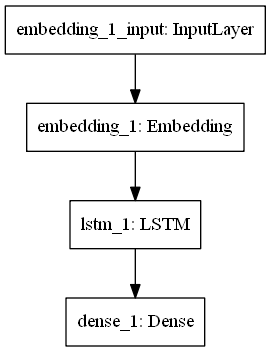

In [17]:
import pydot
# from keras.utils.vis_utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=False)
# Image(filename ='model.png')

In [18]:
train_s1 = pad_sequences(sentence1_word_sequences, maxlen = maxlen)
train_s2 = pad_sequences(sentence2_word_sequences, maxlen = maxlen)
validation_s1 = pad_sequences(validation_sentence1_word_sequences, maxlen = maxlen)
validation_s2 = pad_sequences(validation_sentence2_word_sequences, maxlen = maxlen)
test_s1 = pad_sequences(test_sentence1_word_sequences, maxlen = maxlen)
test_s2 = pad_sequences(test_sentence2_word_sequences, maxlen = maxlen)


In [19]:
validation_label = validation["is_duplicate"].values
train_label = train["is_duplicate"].values
test_label = test["is_duplicate"].values


In [20]:
X_train = train_s1 + train_s2
y_train = train["is_duplicate"].values
X_resampled, y_resampled = undersampleData(X_train, y_train)


Train Data Shape: (241980, 100)
Train Data : 
 1    120990
0    120990
Name: 0, dtype: int64


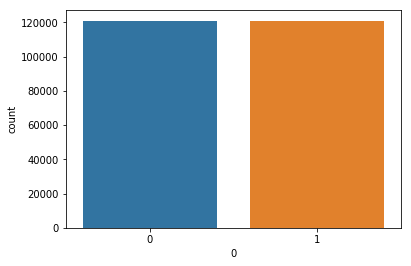

In [21]:
print("Train Data Shape:",X_resampled.shape)
y = pd.DataFrame(y_resampled)
print("Train Data : \n",y[0].value_counts())

sns.countplot(y[0],label="Count")
plt.show()

Train on 241980 samples, validate on 36392 samples
Epoch 1/10
241980/241980 [==============================] - 161s 666us/step - loss: 0.5903 - acc: 0.6803 - val_loss: 0.5680 - val_acc: 0.6986
Epoch 2/10
241980/241980 [==============================] - 180s 746us/step - loss: 0.5112 - acc: 0.7480 - val_loss: 0.5758 - val_acc: 0.6919
Epoch 3/10
241980/241980 [==============================] - 165s 683us/step - loss: 0.4494 - acc: 0.7868 - val_loss: 0.6130 - val_acc: 0.6823
Epoch 4/10
241980/241980 [==============================] - 149s 615us/step - loss: 0.3914 - acc: 0.8156 - val_loss: 0.6633 - val_acc: 0.6782
Epoch 5/10
241980/241980 [==============================] - 147s 609us/step - loss: 0.3384 - acc: 0.8424 - val_loss: 0.7172 - val_acc: 0.6870
Epoch 6/10
241980/241980 [==============================] - 147s 609us/step - loss: 0.2920 - acc: 0.8641 - val_loss: 0.8513 - val_acc: 0.6830
Epoch 7/10
241980/241980 [==============================] - 168s 694us/step - loss: 0.2523 - acc:

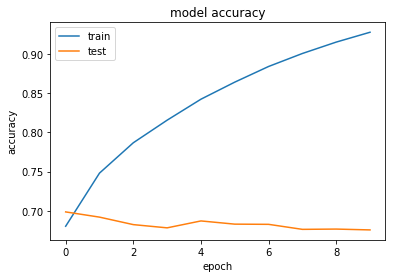

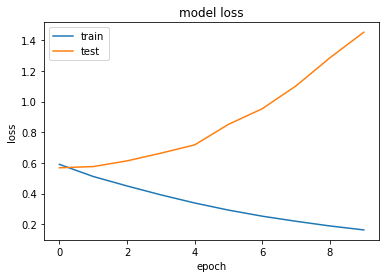

In [22]:
history = model.fit(X_resampled, y_resampled, batch_size=1024, epochs=10, validation_data=(validation_s1 + validation_s2, validation_label))
plotting(history)


In [23]:
loss, acc = model.evaluate(validation_s1 + validation_s2, validation_label , verbose=1)
print('Validation Accuracy: %f' % (acc*100))

36392/36392 [==============================] - 55s 2ms/step
Validation Accuracy: 67.558804


In [24]:
test_label_pred = model.predict(test_s1 + test_s2, batch_size=32, verbose=1)

print("Accuracy:",metrics.accuracy_score(test_label, test_label_pred.round()))

40435/40435 [==============================] - 59s 1ms/step
Accuracy: 0.6719673550142203


              precision    recall  f1-score   support

           0       0.80      0.64      0.71     25575
           1       0.54      0.73      0.62     14860

    accuracy                           0.67     40435
   macro avg       0.67      0.68      0.67     40435
weighted avg       0.71      0.67      0.68     40435



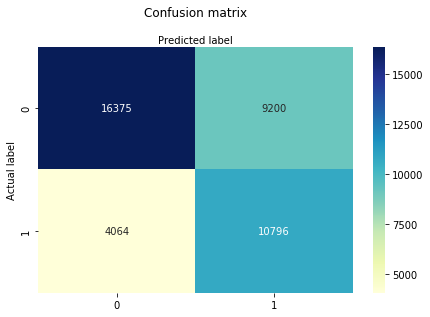

In [25]:
test["Predicted Output"] = test_label_pred.round()
print(classification_report(test["is_duplicate"], test_label_pred.round()))
cnf_matrix = metrics.confusion_matrix(test["is_duplicate"], test_label_pred.round())
confusion_matrix(cnf_matrix)